# An exploration of the causes of suicide

## Introduction
With a population of 1.3 billion, it isn’t surprising that India ranks high in suicides. As a child growing up in India, news of farmers committing suicide to avoid paying debts was common every summer. As the summers grew hotter, these suicide rates kept increasing. The urbanization of India does not seem to have had a positive effect on suicide rates. The government of India has made available [public data](https://data.gov.in/dataset-group-name/accidental-deaths-and-suicides) on deaths caused by accidents and suicides starting from the year 1967 to 2015. A [subset of this data is available on Kaggle](https://www.kaggle.com/rajanand/suicides-in-india), with a surprising amount of detail available for the cause of suicides starting from 2001.

## Correlating suicides due to specific causes with India's demographic data
To explore the data, I first wanted to find a way to normalize the data across states. To do this, I collected population data on each state from Wikipedia (not the best source, but it had to do for now!), and along with population, I collected some other demographic data. To see my steps on scraping Wikipedia and cleaning the data, go [here](Collect_demographic_data_from_Wikipedia.ipynb) and [here](Clean_demographics_data.ipynb).

Now armed with population data, I changed the 'suicide' metric from raw numbers to suicides per 100,000 population for each state. This allowed me to compare numbers across states, and correlate the data using the demographic data I collected.

To visually identify correlations, I've used [Seaborn's regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html), which displays a scatter plot along with the line of best regression fit.

Because there were so many causes of suicide to sift through, and so many demographic indicators to consider, I used ipywidgets' interact module to manually filter the map of regplots between indicators and the data. I also added manually selectable filters on the data, so that I can drill into specific years or a specific gender if I wanted to.

Read on to know more, and download this notebook to use the widget to explore the data yourself!

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = DataFrame.from_csv('Suicides_in_India-2001-2014_newest.csv', index_col = None)
data = data[(data.Total>0) & ~(data.State.str.lower().str.contains('total'))]

In [3]:
data.Type_code.unique()

array(['Means_adopted', 'Social_Status', 'Causes', 'Professional_Profile',
       'Education_Status'], dtype=object)

In [4]:
data_by_causes = data[data.Type_code == 'Causes']
data_by_means_adopted = data[data.Type_code == 'Means_adopted']
data_by_education_status = data[data.Type_code == 'Education_Status']
data_by_professional_profile = data[data.Type_code == 'Professional_Profile']
data_by_social_status = data[data.Type_code == 'Social_Status']

## Causes of Suicide
The list of causes reads like a list of triggers for depression, something that might call for a visit to a psychologist or a psychiatrist, and perhaps even a list of life events that occur in a lot of people’s lives (love affairs, divorce, family problems, fall in social reputation, to name a few). Not to trivialize individual situations, but a lot of these causes seem highly fixable. My aim with this dataset is to use it to use patterns in the data to identify the reasons for the rapid rise of suicide rates in India, and find out what can be done to prevent them. 

In [5]:
data_by_causes.Type.value_counts()

Causes Not Known                                  3914
Other                                             3811
Family Problems                                   3282
Other Prolonged Illness                           3148
Insanity/Mental Illness                           3005
Love Affairs                                      1995
Poverty                                           1784
Death Of Dear Person                              1769
Fall In Social Reputation                         1733
Bankruptcy Or Sudden Change In Economic Status    1712
Drug Abuse/Addiction                              1658
Suspected/Illicit Relation                        1633
Unemployment                                      1632
Property Dispute                                  1628
Failure In Examination                            1617
Cancer                                            1465
Professional/Career Problem                       1351
Cancellation/Non-Settlement Of Marriage           1322
Not Having

## State-wise demographic data
To get an idea of what lies behind these extreme numbers and causes, I've collected data on certain demographic indicators for each state in India. [Wikipedia](https://en.wikipedia.org/wiki/States_and_union_territories_of_India) has a decent collection of data on some interesting indicators, summarized from a variety of sources. I know it's not the most ideal source but will have to do for now!
Links for:
 - [Collecting demographic data by scraping Wikipedia](Collect_demographic_data_from_Wikipedia.ipynb)
 - [Cleaning demographic data collected, consolidating to one csv file](Clean_demographics_data.ipynb)

Let's load up the cleaned demographics data.

In [6]:
demog_data = DataFrame.from_csv('India_demographics.csv')
len(demog_data.columns)

48

In [7]:

demog_data.describe()

,Population-2011,Population-decadal growth-2001-2011,Population-Rural,Population-Urban,Area(sq km),Population-Density,Sex_Ratio,Child_Nutrition_Coverage_percent_of_Children,Crime_rate_per_100000_2015,Crime_Rate_per_100000_2012,...,Child_Sex_Ratio,Tax_Revenues_INR_Billions,TV_ownership_2011_percent,TV_ownership_percent_2001,Underweight_Males_percent,Underweight_Females_percent,Unemployment_Total,Unemployment_Urban,Unemployment_Rural,Vaccination_coverage_percent
count,3.500000e+01,35.000000,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,33.000000,35.000000,35.000000,...,35.000000,28.000000,33.000000,33.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3.356065e+07,18.571429,2.318692e+07,1.038178e+07,90718.971429,856.514286,929.942857,48.627273,218.674286,194.771429,...,925.885714,1091.930000,52.181818,35.793939,20.607143,24.921429,66.857143,67.392857,67.642857,62.860714
std,4.361260e+07,10.957903,3.254814e+07,1.330746e+07,99648.151932,1916.175793,79.755488,16.683755,167.792421,107.605785,...,38.323523,1177.296861,19.526640,16.460311,10.236280,11.173525,44.420311,44.402485,50.121493,19.997525
min,6.442900e+04,0.000000,1.412100e+04,5.030800e+04,32.000000,17.000000,618.000000,5.900000,55.100000,47.000000,...,834.000000,15.470000,14.500000,9.100000,2.200000,2.000000,9.000000,7.000000,10.000000,19.100000
25%,1.420167e+06,13.000000,5.402255e+05,6.418700e+05,9367.500000,160.500000,900.500000,38.200000,133.150000,127.000000,...,898.000000,260.637500,35.300000,24.200000,11.250000,13.800000,41.250000,38.250000,35.500000,50.725000
50%,1.675324e+07,18.000000,9.134820e+06,4.388756e+06,53483.000000,350.000000,946.000000,52.500000,193.000000,178.000000,...,939.000000,684.500000,53.800000,31.500000,22.850000,27.300000,60.000000,55.000000,57.000000,64.350000
75%,5.488521e+07,22.000000,3.486381e+07,1.613304e+07,145449.000000,763.000000,974.500000,60.700000,225.900000,237.500000,...,957.000000,1555.000000,64.100000,44.100000,29.875000,32.700000,79.000000,79.000000,81.500000,76.050000
max,1.992815e+08,55.000000,1.551110e+08,5.082753e+07,342239.000000,11297.000000,1084.000000,69.800000,916.800000,585.000000,...,972.000000,4518.000000,88.000000,74.500000,36.300000,41.000000,197.000000,172.000000,203.000000,100.000000


## Visually identifying correlations

To easily switch between combinations of indicators and data filters, I created a playground to allow manual selection of multiple demographic indicators, as well as set appropriate filters on the suicide data using ipywidgets' interact module.

## DIY Regplots
To explore the data with regplots, select a few indicators, and set filters on causes, gender, year and age group on the suicide data after running the cell below. Once the selections have been made, run the next cell to see the plots. To see the correlation coefficients of the filtered data with each indicator, run the cell after that.


In [8]:
## Step 1: Run this cell to display the interactive list, and make your selections
this_data = data_by_professional_profile
import ipywidgets as widgets
def create_SMwidget(options_list, list_description):
    return widgets.SelectMultiple(
    options=options_list,
    description=list_description,
    disabled=False,
    continueous_update=True,
    rows=len(options_list))

select_indicators = create_SMwidget(demog_data.columns.tolist(),'Indicators')
select_causes = create_SMwidget(this_data.Type.unique().tolist(),'Causes')
select_gender = create_SMwidget(this_data.Gender.unique().tolist(),'Gender')
select_year = create_SMwidget(this_data.Year.unique().tolist(),'Year')
select_agegroup = create_SMwidget(this_data.Age_group.unique().tolist(),'Age group')

widgets.HBox([select_indicators,select_causes,select_gender,select_year,select_agegroup])

A Jupyter Widget

Selected Years: [2009, 2010, 2011, 2012]


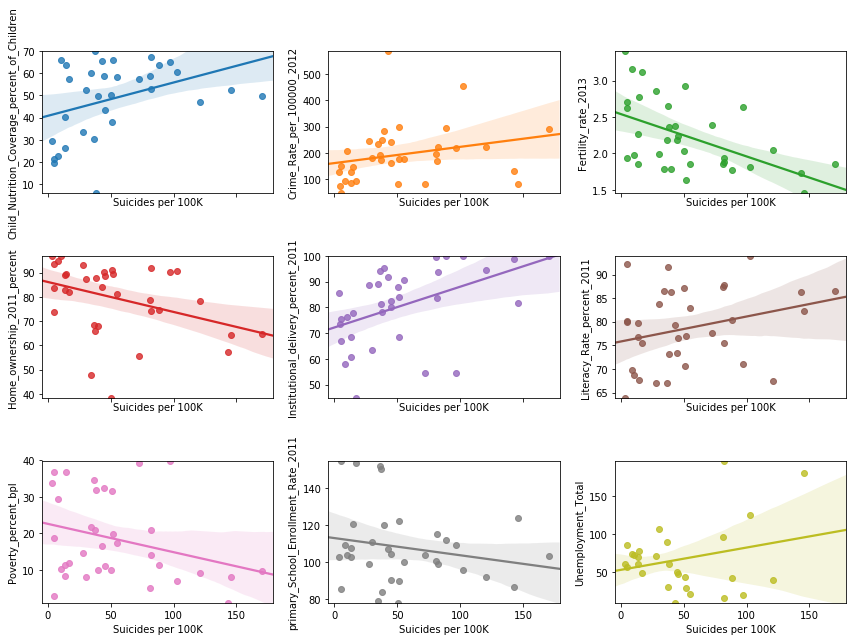

In [11]:
## Step 2: Run this cell to see the regplots

# Collecting filters from user input
selected_indicators = list(select_indicators.get_interact_value())
selected_causes = list(select_causes.get_interact_value())
selected_genders = list(select_gender.get_interact_value())
selected_years = list(select_year.get_interact_value())
selected_agegroups = list(select_agegroup.get_interact_value())

# Filter suicide data
filtered_data = data_by_causes

if len(selected_years) > 0:
    filtered_data = filtered_data[filtered_data.Year.isin(selected_years)]
    print('Selected Years: {}'.format(selected_years))
if len(selected_genders) > 0:
    filtered_data = filtered_data[filtered_data.Gender.isin(selected_genders)]
    print('Selected Genders: {}'.format(selected_genders))
if len(selected_causes) > 0:
    filtered_data = filtered_data[filtered_data.Type.isin(selected_causes)]
    print('Selected Causes: {}'.format(selected_causes))
if len(selected_agegroups) > 0:
    filtered_data = filtered_data[filtered_data.Type.isin(selected_agegroups)]
    print('Selected Age groups: {}'.format(selected_agegroups))

# Get total suicide numbers grouped by State
suicides_filtered = filtered_data.groupby('State')['Total'].sum()

# Get suicide numbers relative to population
population = demog_data['Population-2011'][demog_data.index.isin(suicides_filtered.index)]
suicides_per_100K = (suicides_filtered/population)*100000
suicides_per_100K.name='Suicides per 100K'

# Function to create regplot
# TODO: Generalize by passing dataframes/series as parameters
def create_regplot(col_y, axis):
    y_values = demog_data[col_y][demog_data.index.isin(suicides_per_100K.index)]
    axis.set(ylim=(y_values.min(), y_values.max()))
    sns.regplot(x=suicides_per_100K[suicides_per_100K.index.isin(y_values.index)],y=y_values,label=col_y, ax = axis)

# Figure out the row/column configuration based on number of selected indicators
column_count = 3
row_count = int((len(selected_indicators)//column_count) + 1*(len(selected_indicators) % column_count))

#Create subplots
fig, axes = plt.subplots(row_count,column_count, sharex=True, figsize=(column_count*4,row_count*3))

# Keep track of row and count at the end of the loop - to delete unused axes
r = c = 0
for i, col in enumerate(selected_indicators):
    r = ((i)//column_count)
    c = ((i)%column_count)
    create_regplot(col, axes[r][c])

# Delete unused axes
if c < column_count-1:
    for i in range(c + 1, column_count):
        fig.delaxes(axes[r][i])

fig.tight_layout()
plt.show()

In [12]:
# Step 3: Run this cell to view correlation coefficients using the Pearson method.
# Might need to uncomment the first line of commented code if running this cell more than once in the same session
# TODO: Fix this!
# demog_data.drop('Suicides_data_per100K',axis=1, inplace=True)
demog_data['Suicides_data_per100K'] = suicides_per_100K
correlations = demog_data[['Suicides_data_per100K'] + selected_indicators].corr(method='pearson')
correlations['Suicides_data_per100K'].apply(abs).sort_values(ascending=False)

Suicides_data_per100K                           1.000000
Suicides_per_100000_2012                        0.914779
Household_size                                  0.705960
Fertility_rate_2016                             0.585234
Fertility_rate_2004                             0.572209
Fertility_rate_2013                             0.528236
Institutional_delivery_percent_2011             0.498602
HDI_2015                                        0.478586
Child_Sex_Ratio                                 0.450740
Literacy_rate_2001                              0.409151
Media_exposure_female_percent                   0.401583
Media_exposure_male_percent                     0.397447
GDP_nominal_USD                                 0.387765
Households_having_electricity_percent_2017      0.373807
Tax_Revenues_INR_Billions                       0.356394
Child_Nutrition_Coverage_percent_of_Children    0.350974
Households_having_electricity _percent_2011     0.343597
Home_ownership_2011_percent    

In [ ]:
## Calculating R^2 for Fertility_rate_2013 and female suicides in 2011-2012
import math
math.pow(correlations['Suicides_data_per100K']['Fertility_rate_2013'],2)

## Fertility rates and female suicides

From the initial selections made above, there is some correlation between suicides by women and fertility rates of the closest available year. An $R^{2}$ value of 0.32 isn't the most promising, but there's a good chance that the indicator `Fertility_rate_2013` would be included in the list of indicators that could explain female suicides.



## Assessing the feasibility of anecdotal trends

One of the first trends I had pointed out was the increasing rates of suicide with every year that the summer got hotter. I'd love to check if there is any semblance to this anecdotal trend, and so my next step is to collect regional maximum temperatures and their trends, ideally by state and year. Stay tuned for more!

In [ ]:
data_by_causes.Total.sum()

In [ ]:
summary_professionalprofile_gender = data_by_professional_profile.groupby(['Type','Gender'])['Total'].sum().unstack('Gender')
summary_professionalprofile_gender['Total'] = summary_professionalprofile_gender.Female + summary_professionalprofile_gender.Male
ax = summary_professionalprofile_gender.sort_values(by='Total',ascending=False)[['Female','Male']].plot(kind='barh',stacked=True)
#ax.set_title('Top 10 causes of suicide')
pass

In [ ]:
now_data = data_by_professional_profile
now_data[(now_data.State == 'Andhra Pradesh') & (now_data.Year == 2001) & (now_data.Gender == 'Female') & (now_data.Age_group == '0-14')]

In [ ]:
now_data = data_by_causes
now_data[(now_data.State == 'Andhra Pradesh') & (now_data.Year == 2001) & (now_data.Gender == 'Female') & (now_data.Age_group == '0-14')]